## Generating Random Noise

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

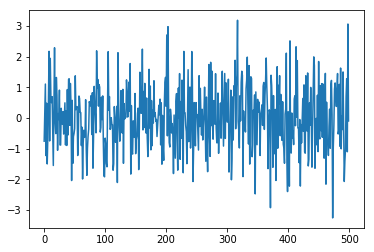

In [7]:
noise=np.random.normal(loc=0,scale=1,size=500)
plt.plot(noise)

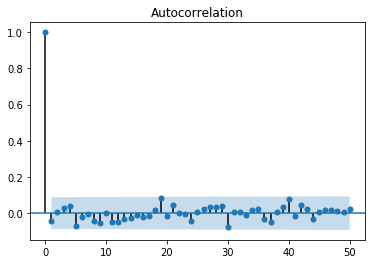

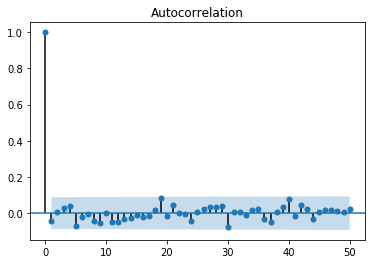

In [8]:
#autocorrelation of random noise
plot_acf(noise,lags=50)

#### This implies random noise has almost zero lag becoz of which the past data cannot be used for predicting or forecasting the future

## Random Walk

#### Today's price is yesterdays price + random value

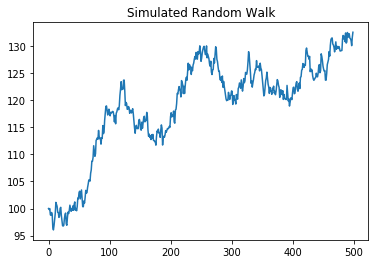

In [21]:
steps = np.random.normal(loc=0, scale=1, size=500)
#print(steps)
steps[0]=0
#print(np.cumsum(steps))
P = 100 + np.cumsum(steps)
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

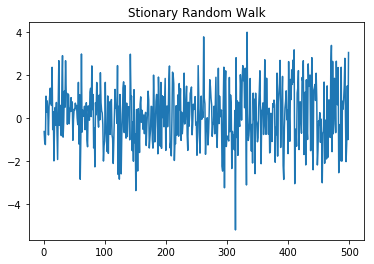

In [28]:
#converting non stationary random walk into stationary
plt.plot(pd.DataFrame(P).diff())
plt.title("Stionary Random Walk")
plt.show()


##### To check whether a series is a  random walk or not we perform a augmented dickey fuller test(adf),if it is not below 5% we cannot reject the hypothesis that the series is a random walk,but we can reject that the spread is a random walk

In [24]:
from statsmodels.tsa.stattools import adfuller
pvalue=adfuller(P)
pvalue[1]

0.44505055446502262

## Random Walk with Drift

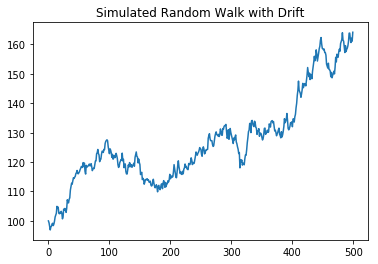

In [25]:
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1
steps[0]=1
P = 100 * np.cumprod(steps)
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

## AR Model

#### Todays value is equal to mean+fraction of yesterdays value+some random value or error or noise

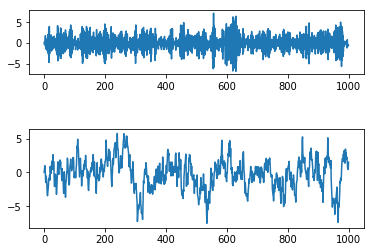

In [34]:
from statsmodels.tsa.arima_process import ArmaProcess
plt.subplot(3,1,1)
ar1 = np.array([1,0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

plt.subplot(2,1,2)
ar2 = np.array([1, -0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

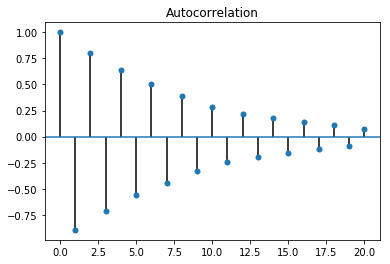

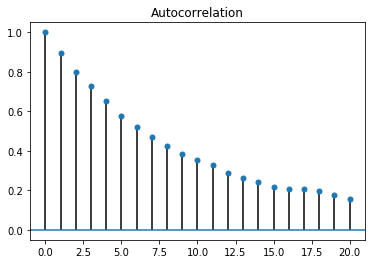

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

## Estimating AR Model

In [43]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data_2, order=(1,0))
result = mod.fit()
result.summary()
#print(result.params)

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1412.485
Method:                       css-mle   S.D. of innovations              0.993
Date:                Thu, 15 Nov 2018   AIC                           2830.970
Time:                        20:46:21   BIC                           2845.694
Sample:                             0   HQIC                          2836.566
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2081      0.289     -0.720      0.472      -0.775       0.359
ar.L1.y        0.8923      0.014     62.930      0.000       0.865       0.920
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1207           +0.0000j            1.1207            0.0000
-----------------------------------------------------------------------------
"""

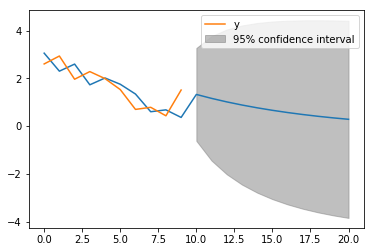

In [44]:
result.plot_predict(start=990, end=1010)
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(interest_rate_data, order=(1,0))
res = mod.fit()
res.plot_predict(start=0,end='2022')
plt.legend(fontsize=8)
plt.show()

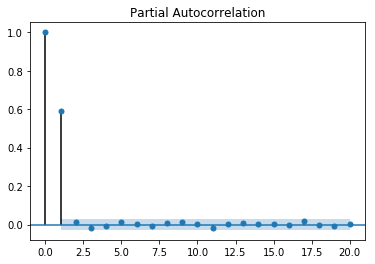

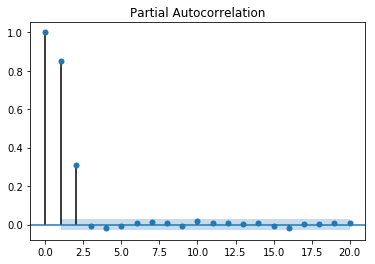

In [47]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)


plot_pacf(simulated_data_1, lags=20)
plt.show()

ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)



plot_pacf(simulated_data_2, lags=20)
plt.show()

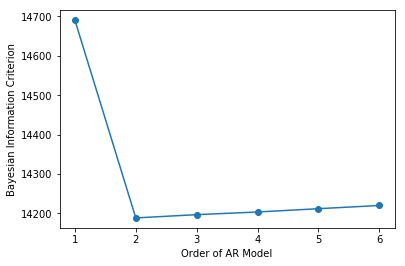

In [49]:
#Estimating the order of AR Model based on Information Criteria BIC(lower the better)
from statsmodels.tsa.arima_model import ARMA
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()   
    BIC[p] = res.bic
    
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

## MA Model

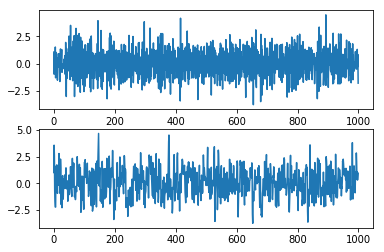

In [51]:
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)


plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

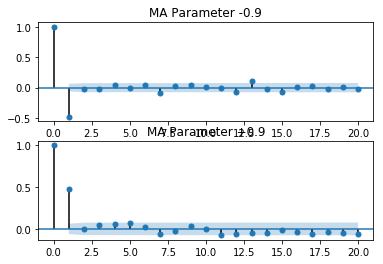

In [52]:
fig, axes = plt.subplots(2,1)
plot_acf(simulated_data_1, lags=20, ax=axes[0])
axes[0].set_title("MA Parameter -0.9")

plot_acf(simulated_data_2, lags=20, ax=axes[1])
axes[1].set_title("MA Parameter +0.9")
plt.show()

## Estimating MA Model

In [53]:
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

print(res.summary())

print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1379.851
Method:                       css-mle   S.D. of innovations              0.961
Date:                Thu, 15 Nov 2018   AIC                           2765.703
Time:                        21:38:03   BIC                           2780.426
Sample:                             0   HQIC                          2771.299
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.003     -0.628      0.530      -0.008       0.004
ma.L1.y       -0.9027      0.017    -54.349      0.000      -0.935      -0.870
                                    Roots           

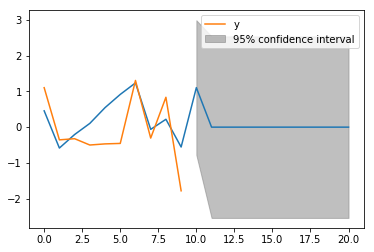

In [54]:
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

## ARMA  Model

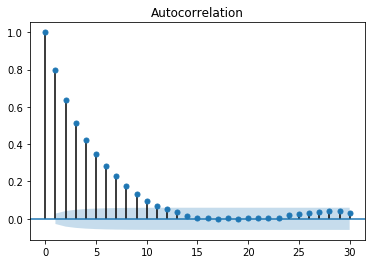

In [55]:
ma = [.8**i for i in range(30)]
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

plot_acf(simulated_data, lags=30)
plt.show()